### Kaggle 대회

 * URL : https://www.kaggle.com/
 * Competitions 선택하면 다양한 대회 확인 가능.
 * 대회 주제 : Bike Sharing Demand
 * https://www.kaggle.com/c/bike-sharing-demand

In [1]:
from IPython.display import display, Image

### 학습 내용


In [2]:
import pandas as pd

In [4]:
## train 데이터 셋 , test 데이터 셋
## train 은 학습을 위한 데이터 셋
## test 은 예측을 위한 데이터 셋(평가)
## parse_dates : datetime 컬럼을 시간형으로 불러올 수 있음
train = pd.read_csv("bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("bike/test.csv", parse_dates=['datetime'])

In [5]:
print(train.shape)   # : 행과 열 갯수 확인
print(test.shape)

(10886, 12)
(6493, 9)


In [6]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능

### 1-2 데이터 탐색해보기
  * Count- Rental 대수 boxplot 보기

In [7]:
print(train['count'].describe())

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


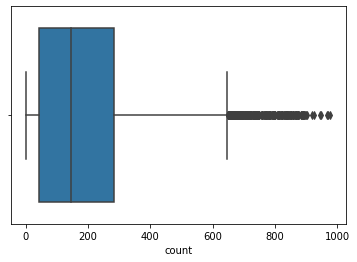

In [8]:
sns.boxplot(train['count'])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

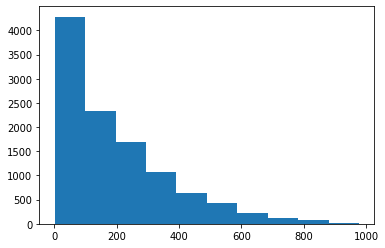

In [9]:
plt.hist(train['count'])

### 1-3 데이터 탐색해 보기 - 시각화
 * 범주형 데이터 : 'season', 'holiday', 'workingday', 'weather'

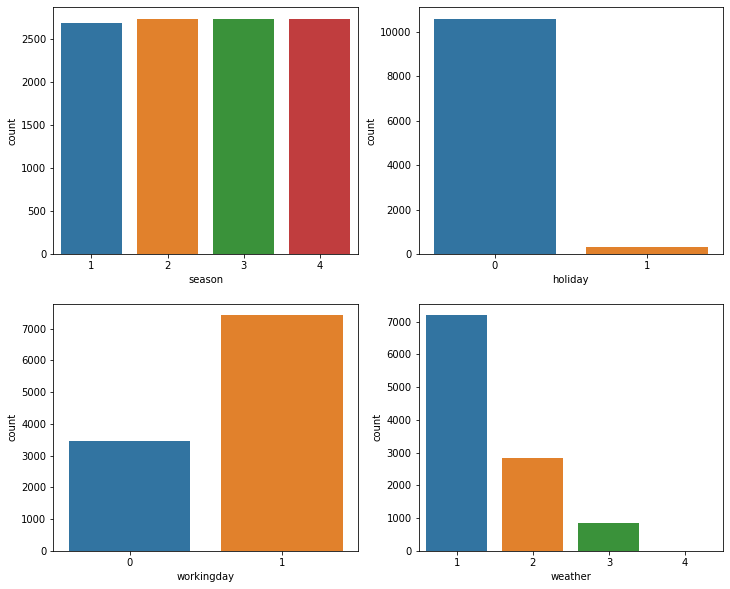

In [11]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show()  # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다. 

### 수치형 데이터 선택

In [12]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

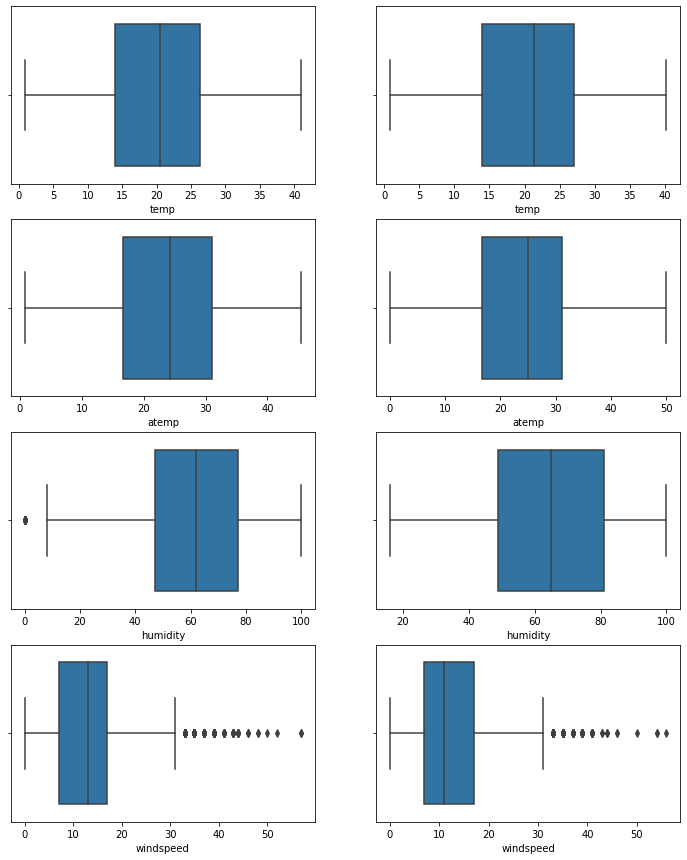

In [13]:
# par(mfrow=c(2,2)) -> R

i = 0
plt.figure(figsize=(12,15))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show() 

In [14]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### 1-4 파생변수(더미변수) 생성

In [15]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [16]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [17]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

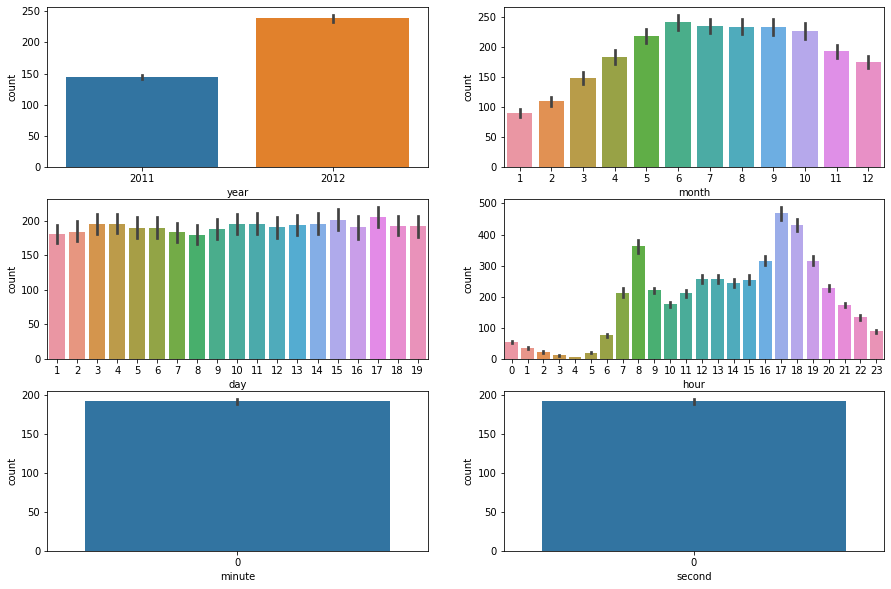

In [18]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

## 확인
 * 2011년, 2012년이 더 많다. (성장했는가?)
 * 여름이 많다.
 * day는 고른 분포를 보인다.
 * hour는 8시, 17,18시대에 많다. (새벽 시간대도 있구나... 음.)
 * minute, second는 0 데이터 의미가 없음.
 * day 1~19 일... 20일이 없네요.(test)

In [19]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

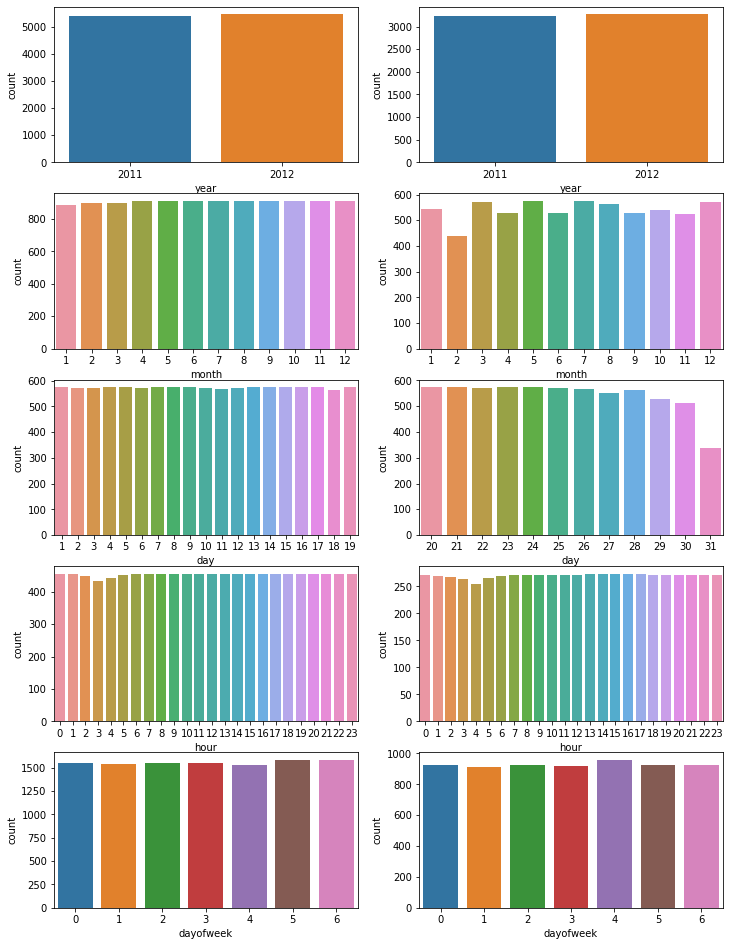

In [20]:
col_names = ['year','month','day','hour','dayofweek']
i = 0

plt.figure(figsize=(12,20))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_tr)
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_test)
  
plt.show()

### 변수 생성

In [21]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek  # Monday=0, Sunday=6

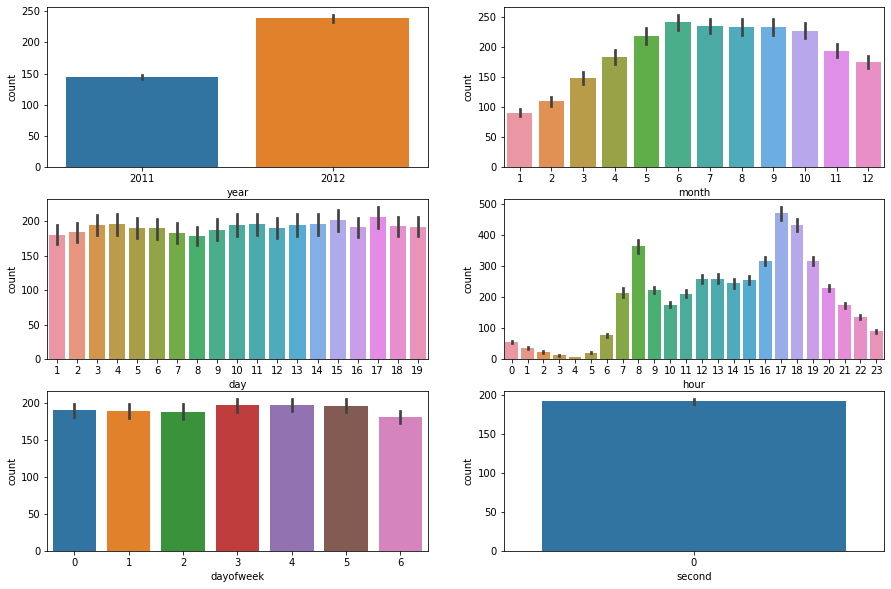

In [22]:
datetime_names = ['year', 'month', 'day', 'hour', 'dayofweek', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

In [23]:
print(new_test.shape)
new_test[["datetime", "year", "month", "day", "hour", "minute", "second", "dayofweek"]].head()

(6493, 16)


,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


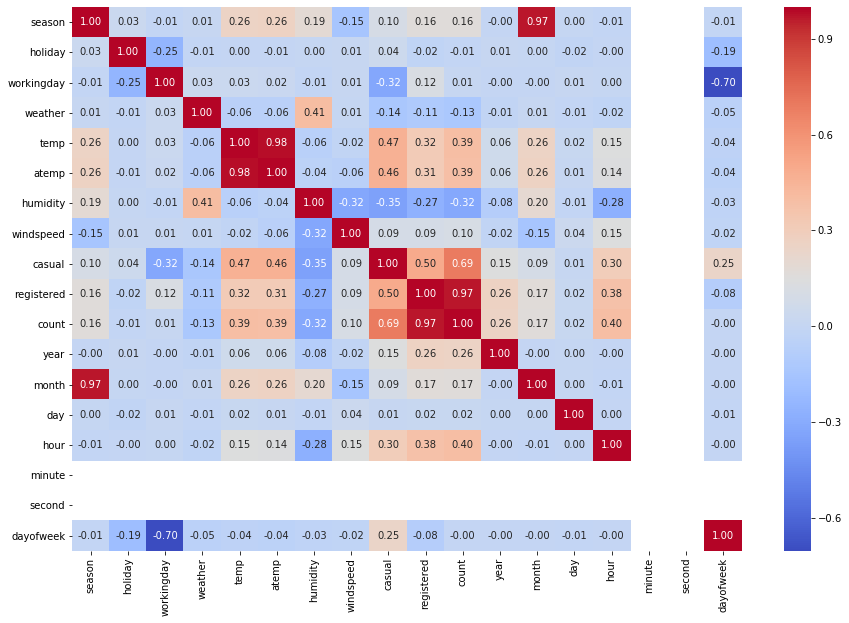

In [24]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [25]:
print(new_tr.columns)
print(new_test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'second'],
      dtype='object')


In [26]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_train = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_train.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  hour  dayofweek  
0  2011     0          5  
1  2011     1          5  
2  2011     2          5  
3  2011     3          5  
4  2011     4          5  


In [27]:
label_name = 'count'                # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]        # 렌탈 대수 변수 값 선택

### 1-5 모델 만들기 및 제출
### 모델 만들기 및 예측 순서
 * 모델을 생성한다. model = 모델명()
 * 모델을 학습한다.  model.fit( 입력값, 출력값 )
 * 모델을 이용하여 예측 model.predict(입력값)

In [28]:
from sklearn.linear_model import LinearRegression   # 선형회귀

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

array([-23.27179232, -20.84936197, -13.04580719, ..., 209.84495832,
       227.95174821, 217.86201958])

In [31]:
sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions
sub.head()

,datetime,count
0,2011-01-20 00:00:00,-23.271792
1,2011-01-20 01:00:00,-20.849362
2,2011-01-20 02:00:00,-13.045807
3,2011-01-20 03:00:00,-1.986454
4,2011-01-20 04:00:00,5.817101


### 음수에 대한 값처리
 * count가 0이하의 경우에 대해서 'count'를 0으로 한다.

In [33]:
sub.loc[ sub['count'] < 0, 'count' ] = 0

In [35]:
sub.loc[ sub['count'] < 0, : ]

,datetime,count


In [36]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("firstsubmission.csv", index=False)

In [37]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [38]:
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

C:\Users\WJ\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 10. ,   4. ,   3.8, ..., 112.7,  91.4,  45.9])

In [40]:
sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions

In [41]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("rf_submission.csv", index=False)